# ML 예시
행복지수와 GDP 관계

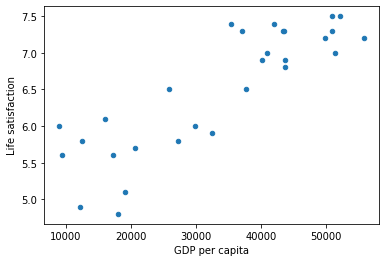

[[5.96242338]]


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

# Load the data (데이터 적재)
oecd_bli = pd.read_csv("data/lifesat/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("data/lifesat/gdp_per_capita.csv",
                             thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data (데이터 전처리)
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data (데이터 탐색)
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model (모델 선택)
model = sklearn.linear_model.LinearRegression()

# Train the model (모델 학습, 훈련)
model.fit(X, y)

# Make a prediction for Cyprus(슬로베니아) (예측, 추론)
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

## 변수 유형
- 독립 변수 (Feature)
- 종속 변수 (Label)

# ML 실습
생선 분류 문제

## 데이터 준비
1. 도미

In [2]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0,
                500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
                610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0,
                714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

## 산점도

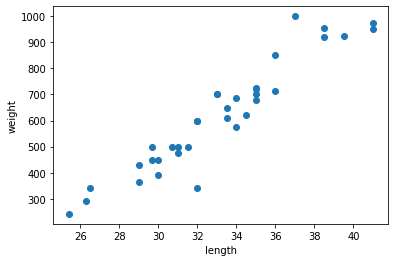

In [3]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

2. 빙어

In [4]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2,
                13.4, 12.2, 19.7, 19.9]

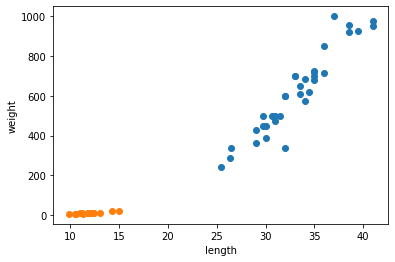

In [5]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 데이터 병합

In [6]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [7]:
# 2차원 리스트로 변환
fish_data = [[l, w] for l, w in zip(length, weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


## 레이블(타겟) 데이터 생성

In [8]:
fish_target = [1] * len(bream_length) + [0] * len(smelt_length)

print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## KNN(K-Nearest Neighbor) 알고리즘 이용

### K-최근접 이웃 알고리즘
- 테스트 데이터와 K개의 훈련 데이터의 y값들을 비교
- 특정 점으로부터 가장 가까운 K개의 데이터를 뽑음
- 분류 : K개의 최근접 이웃들의 class 중 다수결 결과로 class 예측
- 회귀 : K개의 최근접 이웃들이 가지고 있는 값의 평균을 결과값으로 예측
- 동점을 막기 위해 보통 K를 홀수로 정함
    - K가 작으면 과대적합 (노이즈)
    - K가 커지면 과소적합 (전체 빈도/평균)
- 거리
    - Euclidean Distance : $d(g_1, g_2) = \sqrt{\sum_{i=1}^n(x_i-y_i)^2}$
    - Manhattan Distance : $d(g_1, g_2) = \sum_{i=1}^n |x_i-y_i|$
    - Minkowski Distance : $d(g_1, g_2) = \sqrt[m]{\sum_{i=1}^n(x_i-y_i)^m}$
        - m=1 : 맨하탄 거리
        - m=2 : 유클리드 거리
        - other : 민코위스키 거리

## scikit-learn KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier # 분류
# from sklearn.neighbors import KNeighborsRegressor # 회귀

### 객체 생성

In [10]:
kn = KNeighborsClassifier()

### Training : fit(features, label)

In [11]:
kn.fit(fish_data, fish_target) # kn.fit(X, y)

KNeighborsClassifier()

### 모델 평가 : score(features, label) = 정확도

In [12]:
kn.score(fish_data, fish_target) # kn.score(X, y)

1.0

### 정확도(accuracy)
- 정확히 맞힌 개수 / 전체 데이터 수

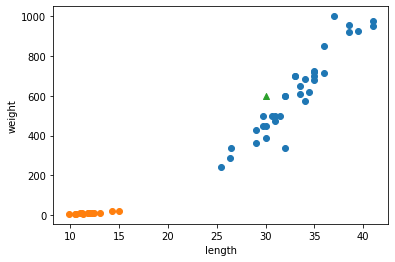

In [13]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [14]:
kn.predict([[30, 600]])

array([1])

### _fit_X : fish_data

In [15]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


### _y : fish_target

In [16]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


### K-neighbors 크기 default

In [17]:
print(kn.n_neighbors)

5


### K-neighbors 크기 지정

In [18]:
kn49 = KNeighborsClassifier(n_neighbors=49)

### K=49인 경우 모델 훈련 및 성능

In [19]:
kn49.fit(fish_data, fish_target)

kn49.score(fish_data, fish_target)

0.7142857142857143

49개 중 도미가 35개이므로 항상 최빈값으로 분류

In [20]:
len(bream_length) / len(fish_data)

0.7142857142857143

## K의 값을 다르게 하며 테스트

In [21]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for k in range(5, 50):
    # 최근접 이웃 개수 설정
    kn.n_neighbors = k
    score = kn.score(fish_data, fish_target)
    print(f'k={k}, score={score}')
    if score <1:
        break

k=5, score=1.0
k=6, score=1.0
k=7, score=1.0
k=8, score=1.0
k=9, score=1.0
k=10, score=1.0
k=11, score=1.0
k=12, score=1.0
k=13, score=1.0
k=14, score=1.0
k=15, score=1.0
k=16, score=1.0
k=17, score=1.0
k=18, score=0.9795918367346939


# Data split
- 언제
    - "충분히 큰" 데이터 세트
    - 아닐 때는 교차 확인(Cross Validation) 고려
- 왜
    - 학습에 사용되지 않은 데이터를 사용하여 예측 수행 > 모델의 일반적인 성능 예측
- 어떻게
    - Hold-out(홀드 아웃)
    - Cross Validation(교차 검증)
    - Stratified Sampling

## Hold-out
- 데이터를 두 개 세트로 나누어 Train, Test로 사용
- 적절한 비율 사용 (7:3 ~ 9:1)
- Train - Validation - Test로 나누기도 함

In [22]:
kn = KNeighborsClassifier()

### Split into Training / Test Set #1

In [23]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

### Fit & Score

In [24]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

편향된 data set이기 때문에 score가 0이 나온다.

### Split into Training / Test Set #2

In [25]:
import numpy as np

In [26]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [27]:
# 난수 생성
np.random.seed(42)

# 인덱스 생성
index = np.arange(49)

# 인덱스 섞기
np.random.shuffle(index)

In [28]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [29]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

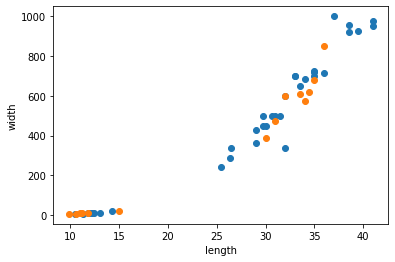

In [30]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('width')
plt.show()

In [31]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [32]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [33]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

# 데이터 전처리

### 두 리스트 열방향으로 합치기

In [64]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [65]:
fish_data = np.column_stack((fish_length, fish_weight))

In [66]:
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

### 라벨 데이터 이어 붙이기

In [67]:
fish_target = np.concatenate(
                (np.ones(len(bream_length)), np.zeros(len(smelt_length)))
                )
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Split into Train / Test Set by using scikit-learn

In [68]:
from sklearn.model_selection import train_test_split

input : X, y  
output : train_X, test_X, train_y, test_y

In [69]:
train_X, test_X, train_y, test_y = train_test_split(fish_data, fish_target, 
                                                    random_state=42)

In [70]:
train_X.shape, test_X.shape

((36, 2), (13, 2))

In [71]:
train_y.shape, test_y.shape

((36,), (13,))

### 데이터 분포를 고려한 분배
- `stratify=data` : data의 분포를 고려하여 분배

In [85]:
train_X, test_X, train_y, test_y = train_test_split(fish_data, fish_target, 
                                                    random_state=42,
                                                    stratify=fish_target)

In [86]:
kn = KNeighborsClassifier()
kn.fit(train_X, train_y)
kn.score(test_X, test_y)

1.0

### 예측

In [93]:
predict_data = np.array([[25, 150]])

In [94]:
print(kn.predict(predict_data))

[0.]


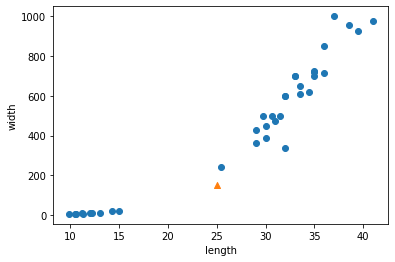

In [95]:
plt.scatter(train_X[:, 0], train_X[:, 1])
plt.scatter(predict_data[:, 0], predict_data[:, 1], marker='^')
plt.xlabel('length')
plt.ylabel('width')
plt.show()

### 예측할 데이터와 이웃하는 데이터들

In [96]:
dist, idx = kn.kneighbors(predict_data)

In [97]:
dist

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

In [98]:
idx

array([[21, 33, 19, 30,  1]], dtype=int64)

In [99]:
train_X[idx]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

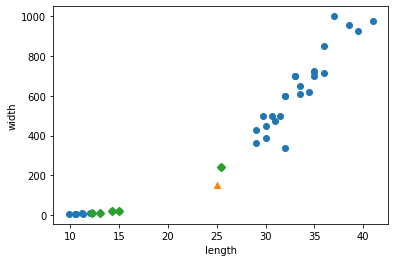

In [101]:
plt.scatter(train_X[:, 0], train_X[:, 1])
plt.scatter(predict_data[:, 0], predict_data[:, 1], marker='^')
plt.scatter(train_X[idx, 0], train_X[idx, 1], marker='D')
plt.xlabel('length')
plt.ylabel('width')
plt.show()

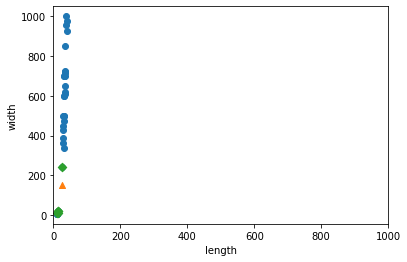

In [102]:
plt.scatter(train_X[:, 0], train_X[:, 1])
plt.scatter(predict_data[:, 0], predict_data[:, 1], marker='^')
plt.scatter(train_X[idx, 0], train_X[idx, 1], marker='D')
plt.xlabel('length')
plt.ylabel('width')
plt.xlim(0, 1000)
plt.show()

## 스케일을 같게
- 표준화

In [103]:
mean = np.mean(train_X, axis=0)
print(mean)

[ 27.29722222 454.09722222]


In [104]:
std = np.std(train_X, axis=0)
print(std)

[  9.98244253 323.29893931]


In [106]:
train_scaled = (train_X - mean) / std
print(train_scaled[:10])

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]]


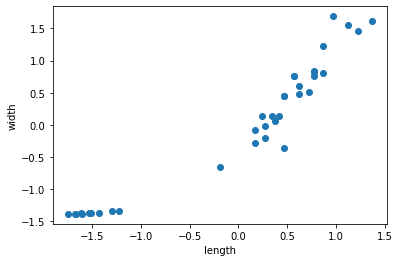

In [107]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.xlabel('length')
plt.ylabel('width')
plt.show()

### 테스트 데이터도 스케일링

In [108]:
new = (predict_data - mean) / std

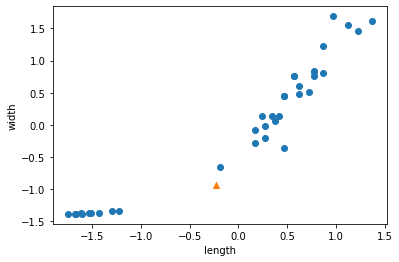

In [109]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[:, 0], new[:, 1], marker='^')
plt.xlabel('length')
plt.ylabel('width')
plt.show()

In [110]:
kn.fit(train_scaled, train_y)
kn.predict(new)

array([1.])

In [111]:
test_scaled = (test_X - mean) / std

In [112]:
kn.score(test_scaled, test_y)

1.0

In [113]:
_, idx_scaled = kn.kneighbors(new)

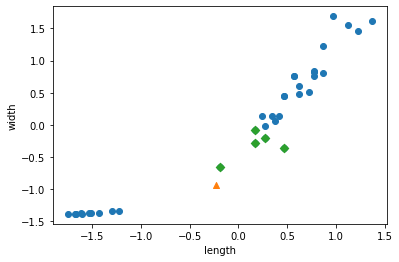

In [114]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[:, 0], new[:, 1], marker='^')
plt.scatter(train_scaled[idx_scaled, 0], train_scaled[idx_scaled, 1], marker='D')
plt.xlabel('length')
plt.ylabel('width')
plt.show()